# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,PolynomialFeatures,FunctionTransformer
from sklearn.compose import make_column_selector,ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import make_column_selector
from matplotlib import cm
c1=cm.get_cmap('gist_rainbow_r')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Loading Data</p>

In [2]:
data=pd.read_csv('/kaggle/input/laptop-price-prediction-dataset/data.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Preprocessing</p>

In [3]:
data=data.drop(data.columns[:2],axis=1)

In [4]:
data.spec_rating=round(data.spec_rating)

In [5]:
data.drop('name',axis=1,inplace=True)

In [6]:
data.duplicated().value_counts()

False    891
True       2
Name: count, dtype: int64

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              891 non-null    object 
 1   price              891 non-null    int64  
 2   spec_rating        891 non-null    float64
 3   processor          891 non-null    object 
 4   CPU                891 non-null    object 
 5   Ram                891 non-null    object 
 6   Ram_type           891 non-null    object 
 7   ROM                891 non-null    object 
 8   ROM_type           891 non-null    object 
 9   GPU                891 non-null    object 
 10  display_size       891 non-null    float64
 11  resolution_width   891 non-null    float64
 12  resolution_height  891 non-null    float64
 13  OS                 891 non-null    object 
 14  warranty           891 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 111.4+ KB



<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">TAKING NUMERICAL FEATURES ALONE</p>
</div>


In [9]:
numerical=make_column_selector(dtype_include='number')(data)

In [10]:
data1=data[numerical]



<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">SCATTERPLOTS WITH TARGET VARIABLES TO KNOW THE PATTERN</p>
</div>


Text(0.5, 1.0, 'Price Vs Spec Rating')

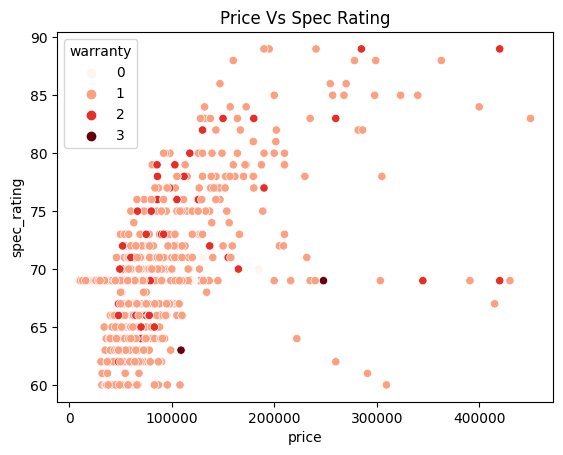

In [11]:
sb.scatterplot(data=data1,x='price',y='spec_rating',hue='warranty',palette='Reds')
plt.title('Price Vs Spec Rating')

Text(0.5, 1.0, 'Price Vs Display Size')

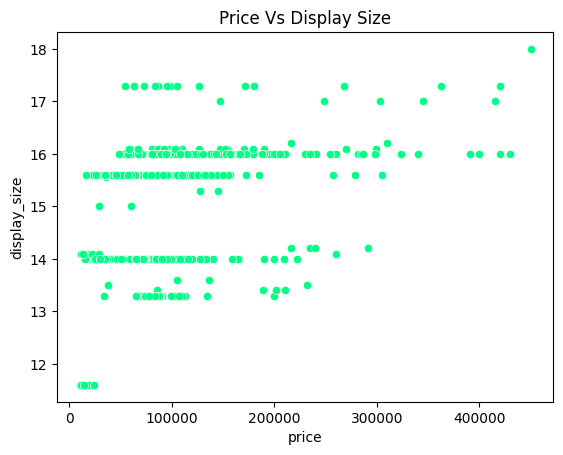

In [12]:
sb.scatterplot(data=data1,x='price',y='display_size',color=c1(0.5))
plt.title('Price Vs Display Size')

Text(0.5, 1.0, 'Price Vs Resolution Width')

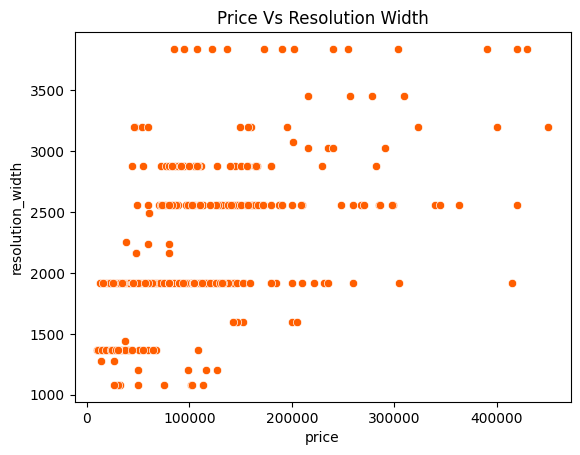

In [13]:
sb.scatterplot(data=data1,x='price',y='resolution_width',color=c1(0.9))
plt.title('Price Vs Resolution Width')

Text(0.5, 1.0, 'Price Vs Resolution Height')

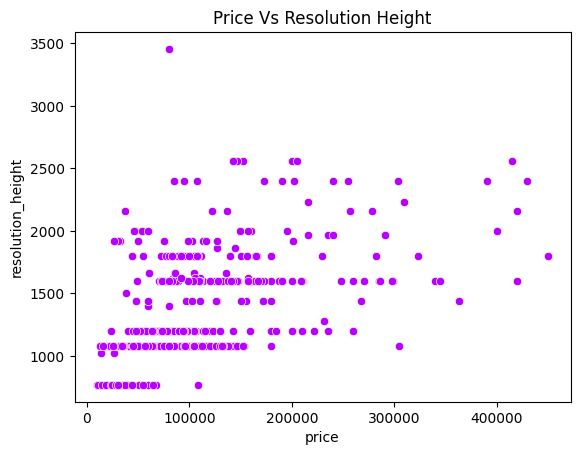

In [14]:
sb.scatterplot(data=data1,x='price',y='resolution_height',color=c1(0.1))
plt.title('Price Vs Resolution Height')

Text(0.5, 1.0, 'Warranty Vs Price')

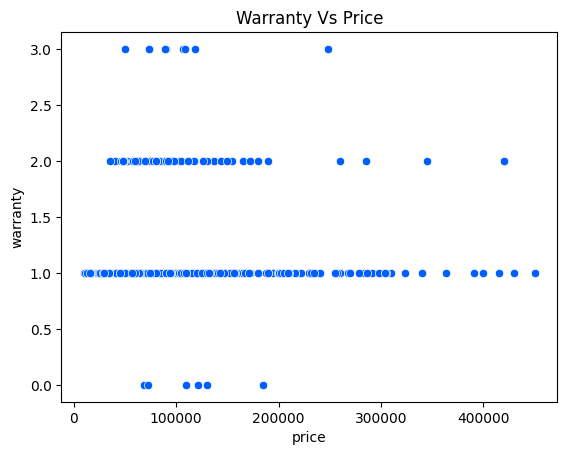

In [15]:
sb.scatterplot(data=data1,x='price',y='warranty',color=c1(0.3))
plt.title('Warranty Vs Price')



<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">CORRELATION HEATMAP</p>
</div>


Text(0.5, 1.0, 'Heatmap')

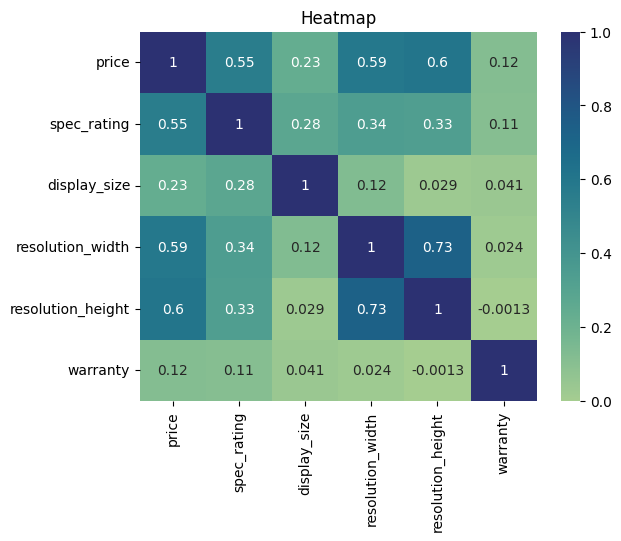

In [16]:
sb.heatmap(data=data1.corr(),annot=True,cmap='crest')
plt.title('Heatmap')


<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>REMOVING DISPLAY_SIZE AND WARRANTY COZ THEY ARE NOT CORRELATED WELL</strong></li>
    </ul>
</div>


In [17]:
data.drop(['display_size','warranty'],axis=1,inplace=True)




<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">FREQUENCY CHECK</p>
</div>


In [18]:
data1.spec_rating.value_counts().head(3)

spec_rating
69.0    325
60.0     48
71.0     44
Name: count, dtype: int64



<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Most_frequent spec_rating is 69</strong></li>
    </ul>
</div>



<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">ABOUT TARGET VARIABLE</p>
</div>


In [19]:
data.price.describe()

count       891.000000
mean      80010.479237
std       60909.441363
min        9999.000000
25%       44835.000000
50%       61990.000000
75%       90990.000000
max      450039.000000
Name: price, dtype: float64




<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>MAXIMUM price=4.5 lakhs</strong></li>
         <li><strong>MINIMUM price=9999(appx 1K)
</strong></li>
         <li><strong>AVERAGE price=80K</strong></li>
    </ul>
</div>






<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">BRAND POPULARITY</p>
</div>


Text(0.5, 1.0, 'POPULARITY OF BRAND BY PRODUCT')

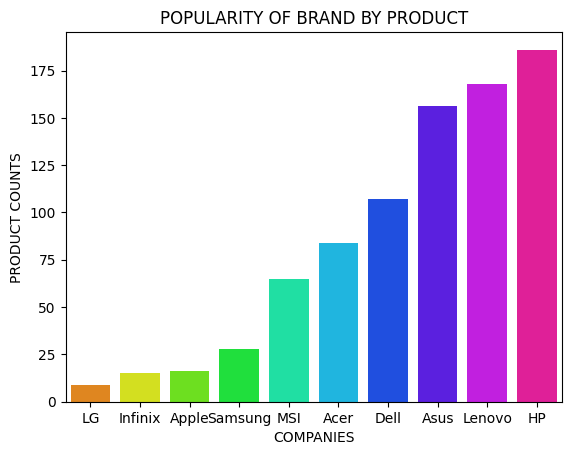

In [20]:
val=data.brand.value_counts().head(10)
sb.barplot(data=val,x=val.index,y=val.values,palette='hsv')
plt.xticks(range(10),val.index[::-1])
plt.xlabel('COMPANIES')
plt.ylabel('PRODUCT COUNTS')
plt.title('POPULARITY OF BRAND BY PRODUCT')






<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">ROM(READ ONLY MEMORY OF LAPTOPS)</p>
</div>


Text(0.5, 1.0, 'ROM Type')

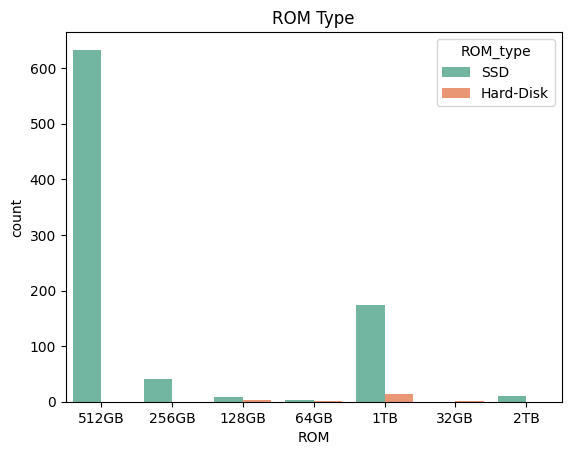

In [21]:
sb.countplot(data=data,x='ROM',hue='ROM_type',palette='Set2')
plt.title('ROM Type')







<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">PLAYING WITH OS</p>
</div>


Text(0.5, 1.0, 'OS vs PRICE of LAPTOP')

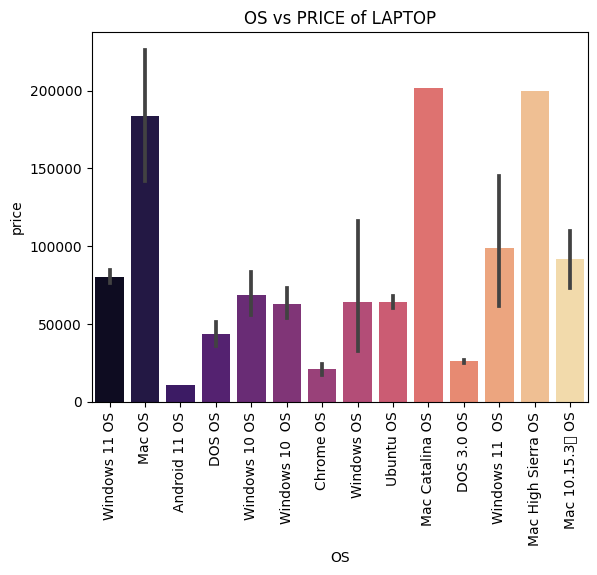

In [22]:

sb.barplot(data=data,x='OS',y='price',palette='magma')
plt.xticks(rotation=90)
plt.title('OS vs PRICE of LAPTOP')


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Machine Learning</p>

In [23]:
selector=make_column_selector(dtype_include='object')

In [24]:
y=data.price
x=data.drop('price',axis=1)

In [25]:
def logtrans(x):
    return np.log(x)


In [26]:
lab=selector(x)

In [27]:
col=ColumnTransformer([('log',FunctionTransformer(func=logtrans),['spec_rating','resolution_width','resolution_height']),('one',OneHotEncoder(sparse=False,handle_unknown='ignore'),lab)],remainder='passthrough')







<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Constructing Pipelines</p>
</div>


In [28]:
pipe1=Pipeline(steps=[('col',col),('scale',StandardScaler()),('model1',DecisionTreeRegressor())])
pipe2=Pipeline(steps=[('col',col),('scale',StandardScaler()),('min',MinMaxScaler()),('model2',SVR())])
pipe3=Pipeline(steps=[('col',col),('scale',StandardScaler()),('min',MinMaxScaler()),('model3',RandomForestRegressor())])
pipe4=Pipeline(steps=[('col',col),('scale',StandardScaler()),('min',MinMaxScaler()),('model4',LinearRegression())])
pipe5=Pipeline(steps=[('col',col),('scale',StandardScaler()),('min',MinMaxScaler()),('model5',KNeighborsRegressor())])







<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Splitting Data</p>
</div>


In [29]:
xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2,random_state=1)







<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Fitting Pipelines</p>
</div>


In [30]:
pipe1.fit(xtra,ytra)
pipe2.fit(xtra,ytra)
pipe3.fit(xtra,ytra)
pipe4.fit(xtra,ytra)
pipe5.fit(xtra,ytra)


Pipeline(steps=[('col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<function logtrans at 0x7e53d0338e50>),
                                                  ['spec_rating',
                                                   'resolution_width',
                                                   'resolution_height']),
                                                 ('one',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['brand', 'processor', 'CPU',
                                                   'Ram', 'Ram_type', 'ROM',
                                                   'ROM_type', 'GPU',
                                                   'OS'])])),
                ('scale', StandardScaler()), ('min', MinMaxScaler()),
                ('model5', KNeighborsRegressor())])







<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Predicting Data Using Models</p>
</div>


In [31]:
ypred1=pipe1.predict(xtest)
ypred2=pipe2.predict(xtest)
ypred3=pipe3.predict(xtest)
ypred4=pipe4.predict(xtest)
ypred5=pipe5.predict(xtest)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Results</p>

In [32]:
print('Results:\n',r2_score(ytest,ypred1))
print(r2_score(ytest,ypred2))
print(r2_score(ytest,ypred3))
print(r2_score(ytest,ypred4))
print(r2_score(ytest,ypred5))

Results:
 0.4861678128377225
-0.08912503313718867
0.6884110585000992
-3.790237529414489e+23
0.7767707740810221


In [33]:
cross_val_score(pipe5,x,y)

array([0.67017866, 0.84990968, 0.60427534, 0.74568353, 0.67121759])


<div style="border-radius: 10px; border: rgb(255, 87, 34) solid; padding: 15px; background-color: rgb(52, 73, 94); font-size: 100%; text-align: left; color: #ecf0f1; box-shadow: 0 0 15px rgba(255, 87, 34, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>KneighborsRegressor Performs well</strong></li>
    </ul>
</div>


<div style="border-radius: 10px; border: 2px solid #e74c3c; padding: 15px; background-color: #ecf0f1; font-size: 120%; text-align: center; color: #3498db; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="margin: 0; font-weight: bold; font-size: 150%;">Thank you!</p>
    <p style="margin: 10px 0 20px;">May your day be filled with happiness and positivity!</p>
    <p style="margin: 0;">Explore and discover the wonderful content we have for you.</p>
</div>
